# Data Wrangling
Process of 'cleaning','transforming' and 'organizing' data so that it can be used for analysis and organization

# Steps
1. gathering data
2. tools to clean data
3. how to clean data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# For missing values
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
df.drop(columns="deck",inplace=True)

In [6]:
df['age']=df.age.fillna(value=df['age'].mean())

In [7]:
df['embarked']=df.embarked.fillna(value=df['embarked'].mode()[0])

In [8]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [9]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# OUTLIER REMOVAL

<Axes: xlabel='age'>

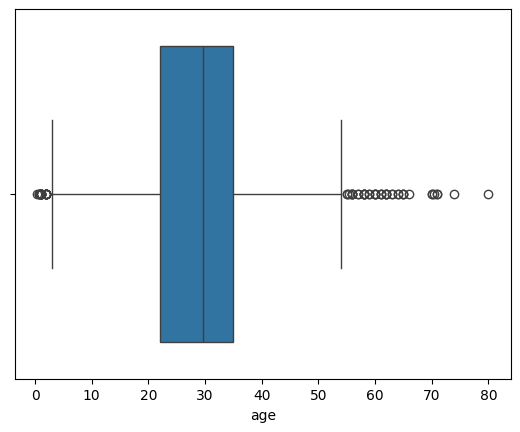

In [10]:
# Visualization method
import seaborn as sns
sns.boxplot(data=df,x="age")


<Axes: xlabel='sex', ylabel='age'>

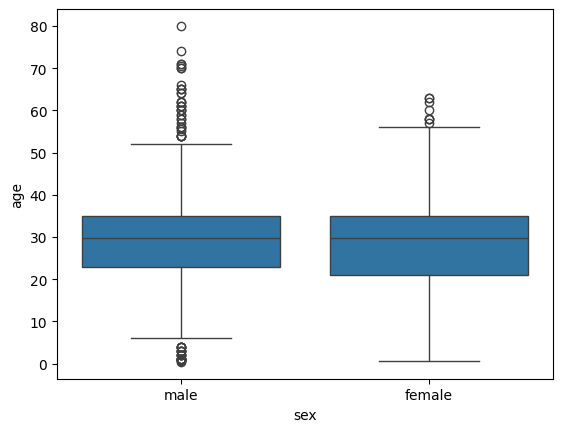

In [11]:
sns.boxplot(data=df,y="age",x="sex")

In [12]:
# IQR MEthod
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR

np.float64(13.0)

In [13]:
# IQR MEthod
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q1 + 1.5 * IQR
df=df[(df['age'] > lower_bound) & (df['age'] < upper_bound )]

In [14]:
df.shape

(725, 14)

In [15]:
# IQR MEthod
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q1 + 1.5 * IQR
df=df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound )]

<Axes: xlabel='age', ylabel='Count'>

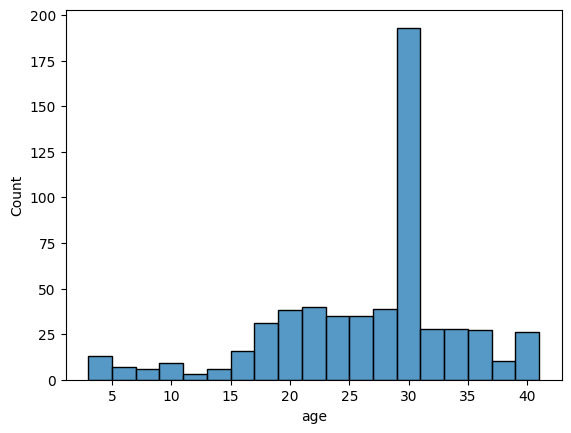

In [16]:
sns.histplot(df['age'])

In [17]:
# from scipy import stats
# import numpy as np
# zscore=np.abs(stats.zscore(df['age']))
# threshold=3
# df=df[(zscore<threshold).all(axis=1)]

# Finding and droping duplicates

In [18]:
df.shape

(590, 14)

In [19]:
df_duplicates=df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [33]:
df.shape

(590, 14)

In [37]:
df.duplicated().sum() # to check number of duplicates

np.int64(99)

In [14]:
df.drop_duplicates(inplace=True)

# DATA NORMALIZATION


In [25]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 390.1 kB/s eta 0:00:28
   - -------------------------------------- 0.5/11.1 MB 390.1 kB/s eta 0:00:28
   - -------------------------------------- 0.5/11.1 MB 390.1 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/11.1 MB 372.9 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/11.1 MB 372.9 kB/s eta 0:00:28
   -- -------------------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 

# data
df

# normalize columns
cols_to_normalize= ['age','fare']

# create the scaler function tool
scaler= MinMaxScaler()

# fit and transform data on scaler
df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])


# check data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.500000,1,0,0.195924,S,Third,man,True,Southampton,no,False
2,1,3,female,0.605263,0,0,0.214165,S,Third,woman,False,Southampton,yes,True
4,0,3,male,0.842105,0,0,0.217543,S,Third,man,True,Southampton,no,True
5,0,3,male,0.702608,0,0,0.228577,Q,Third,man,True,Queenstown,no,True
8,1,3,female,0.631579,0,2,0.300866,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.631579,0,0,0.351311,S,Second,man,True,Southampton,no,True
887,1,1,female,0.421053,0,0,0.810719,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.702608,1,2,0.633712,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.605263,0,0,0.810719,C,First,man,True,Cherbourg,yes,True


In [30]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.315254,2.649153,0.610271,0.376271,0.291525,0.366959
std,0.465011,0.594791,0.206136,0.790937,0.734613,0.221274
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.480263,0.000000,0.000000,0.210702
50%,0.000000,3.000000,0.684211,0.000000,0.000000,0.256728
75%,1.000000,3.000000,0.702608,1.000000,0.000000,0.485080
max,1.000000,3.000000,1.000000,4.000000,5.000000,1.000000


# standard scaler


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# data
df

# normalize columns
cols_to_normalize= ['age','fare']

# create the scaler function tool
scaler= StandardScaler()

# fit and transform data on scaler
df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])


# check data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.535396,1,0,-0.773609,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.024312,0,0,-0.691103,S,Third,woman,False,Southampton,yes,True
4,0,3,male,1.125625,0,0,-0.675824,S,Third,man,True,Southampton,no,True
5,0,3,male,0.448327,0,0,-0.625916,Q,Third,man,True,Queenstown,no,True
8,1,3,female,0.103458,0,2,-0.298945,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.103458,0,0,-0.070774,S,Second,man,True,Southampton,no,True
887,1,1,female,-0.918708,0,0,2.007176,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.448327,1,2,1.206554,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.024312,0,0,2.007176,C,First,man,True,Cherbourg,yes,True


In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,590.000000,590.000000,5.900000e+02,590.000000,590.000000,5.900000e+02
mean,0.315254,2.649153,2.258081e-16,0.376271,0.291525,-5.871010e-17
std,0.465011,0.594791,1.000849e+00,0.790937,0.734613,1.000849e+00
min,0.000000,1.000000,-2.963042e+00,0.000000,0.000000,-1.659794e+00
25%,0.000000,2.000000,-6.312239e-01,0.000000,0.000000,-7.067668e-01
50%,0.000000,3.000000,3.590002e-01,0.000000,0.000000,-4.985868e-01
75%,1.000000,3.000000,4.483270e-01,1.000000,0.000000,5.342762e-01
max,1.000000,3.000000,1.892250e+00,4.000000,5.000000,2.863315e+00


# log transformation

In [47]:
kashti= sns.load_dataset("titanic")
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# data
kashti

# normalize columns
cols_to_normalize= ['age']

# create the scaler function tool
scaler= StandardScaler()

# fit and transform data on scaler
kashti[cols_to_normalize]=scaler.fit_transform(kashti[cols_to_normalize])


# check data
kashti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,-0.737041,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,-0.254825,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

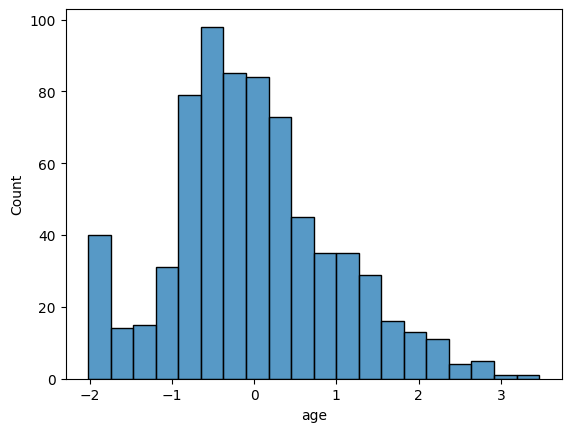

In [49]:
sns.histplot(kashti["age"])

<Axes: xlabel='age', ylabel='Count'>

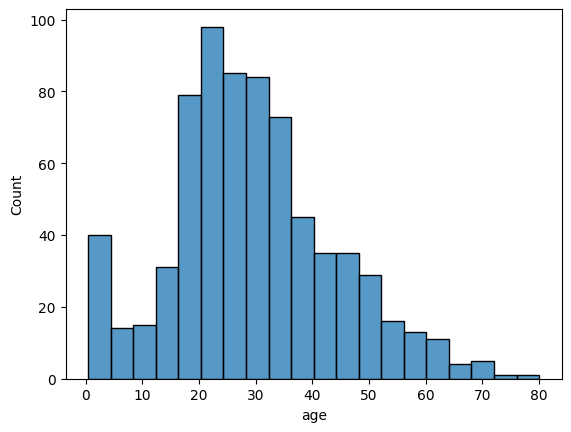

In [46]:
sns.histplot(kashti["age"])

In [38]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
import numpy as np
kashti["age"]=kashti["age"].fillna(kashti["age"].median())
kashti["fare"]=kashti["fare"].fillna(kashti["fare"].median())

#log transform
kashti["age"]=np.log(kashti["age"])
kashti["fare"]=np.log(kashti["fare"])

kashti.head()

C:\Users\ua\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

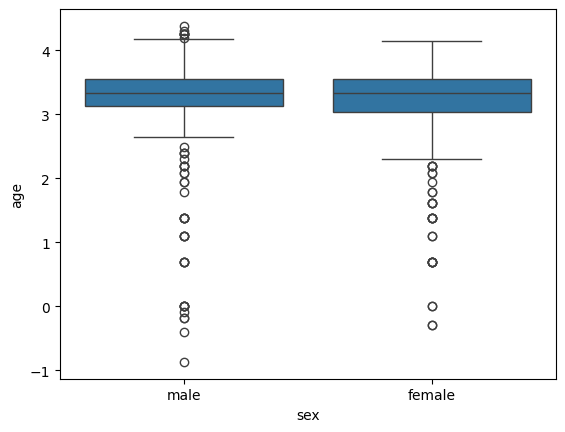

In [41]:
sns.boxplot(data=kashti,x="sex",y="age")

<Axes: xlabel='sex', ylabel='fare'>

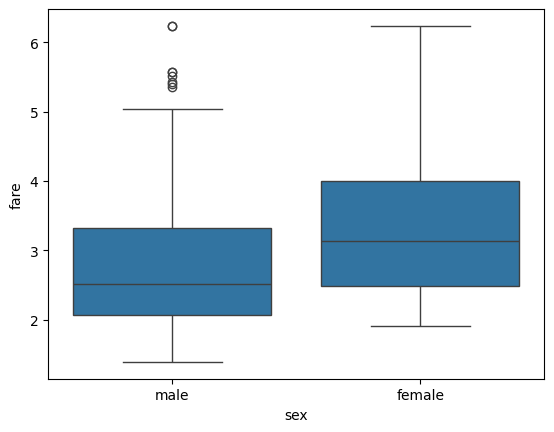

In [42]:
sns.boxplot(data=kashti,x="sex",y="fare")

<Axes: xlabel='age', ylabel='Count'>

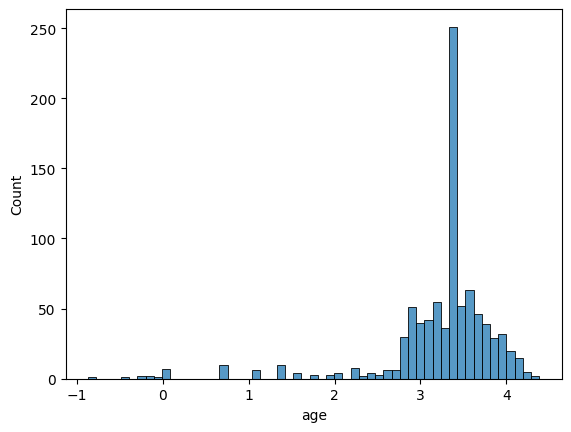

In [43]:
sns.histplot(kashti["age"])

# Organizing data
## creating new columns

In [52]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [53]:
df["family_size"]=df["sibsp"]+df["parch"]

<Axes: xlabel='family_size', ylabel='Count'>

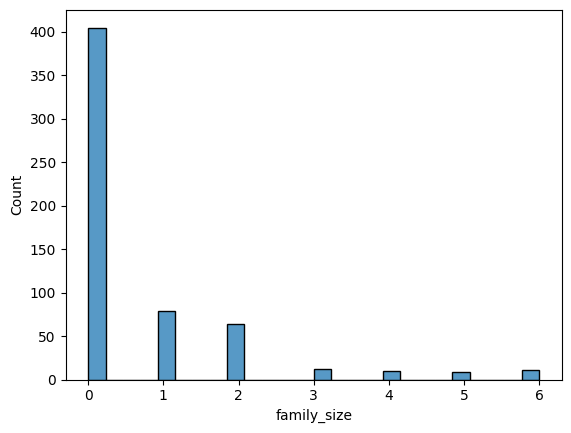

In [54]:
sns.histplot(df["family_size"])

C:\Users\ua\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

C:\Users\ua\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ua\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


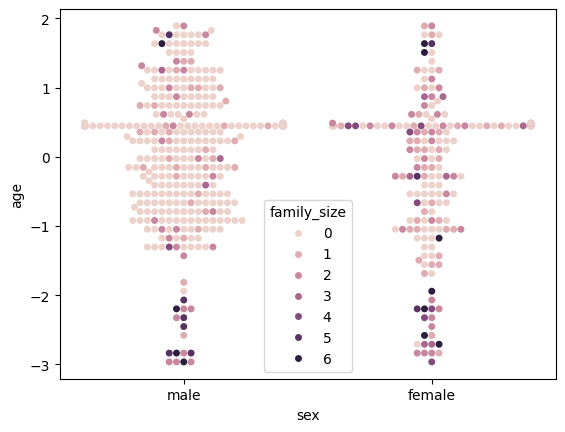

In [56]:
sns.swarmplot(data=df,x="sex",y="age",hue="family_size")

In [57]:
df=df.rename(columns={"survived":"survival"})

In [58]:
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [63]:
table=pd.pivot_table(df,values="fare",index="pclass",
               columns="survival",aggfunc=np.sum)
table

C:\Users\ua\AppData\Local\Temp\ipykernel_11868\320546444.py:1: FutureWarning: The provided callable <function sum at 0x00000254ED434900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=pd.pivot_table(df,values="fare",index="pclass",


survival,0,1
pclass,,
1,13.000754,36.381789
2,16.716602,48.123555
3,-90.101654,-24.121046


<Axes: xlabel='fare', ylabel='age'>

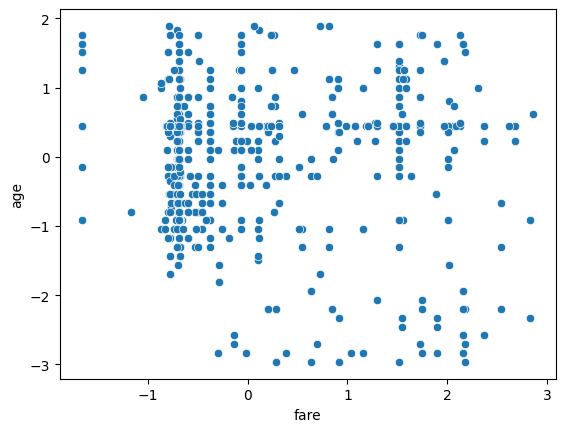

In [64]:
sns.scatterplot(data=df,x="fare",y="age")

In [65]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.535396,1,0,-0.773609,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.024312,0,0,-0.691103,S,Third,woman,False,Southampton,yes,True,0
4,0,3,male,1.125625,0,0,-0.675824,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.448327,0,0,-0.625916,Q,Third,man,True,Queenstown,no,True,0
8,1,3,female,0.103458,0,2,-0.298945,S,Third,woman,False,Southampton,yes,False,2


# SAVING THE WRANGLED DATA

In [67]:
df.to_csv("preprocess.csv")